## Multiple Regression Exercise

In [1]:
from google.colab import drive
import sys
import numpy as np
from matplotlib import pyplot as plt
import numpy.linalg as la

# Compute the sample mean and standard deviations for each feature (column)
# across the training examples (rows) from the data matrix X.

In [2]:
def mean_std(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return mean, std

# Standardize the features of the examples in X by subtracting their mean and
# dividing by their standard deviation, as provided in the parameters.

In [3]:
def standardize(X, mean, std):
    S = (X - mean) / std
    return S

# Read data matrix X and labels t from text file.

In [4]:
def read_data(file_name):
    data = np.loadtxt(file_name)
    X = data[:, :-1]
    t = data[:, -1]
    return X, t

# Implement gradient descent algorithm to compute w = [w0, w1, ..].

In [5]:
def train(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])
    for epoch in range(epochs):
        grad = compute_gradient(X, t, w)
        w -= eta * grad
        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)
            print(f'Epoch {epoch}: Cost = {cost}')
    costs.append(cost)
    ep.append(epochs - 1)
    return w, ep, costs

# Compute RMSE on dataset (X, t).

In [6]:
def compute_rmse(X, t, w):
    y_pred = np.dot(X, w)
    rmse = np.sqrt(np.mean((y_pred - t)**2))
    return rmse

# Compute objective function (cost) on dataset (X, t).

In [7]:
def compute_cost(X, t, w):
    y_pred = np.dot(X, w)
    cost = 0.5 * np.mean((y_pred - t)**2)
    return cost

# Compute gradient of the objective function (cost) on dataset (X, t).

In [8]:
def compute_gradient(X, t, w):
    N = len(X)
    grad = np.dot(X.T, (np.dot(X, w) - t)) / N
    return grad

# BONUS: Implement stochastic gradient descent algorithm to compute w = [w0, w1, ..].

In [9]:
def train_SGD(X, t, eta, epochs):
    costs = []
    ep = []
    w = np.zeros(X.shape[1])

    for epoch in range(epochs):
        for i in range(len(X)):
            rand_idx = np.random.randint(len(X))
            xi = X[rand_idx]
            ti = t[rand_idx]
            grad = compute_gradient(xi.reshape(1, -1), ti, w)
            w -= eta * grad

        if epoch % 10 == 0:
            cost = compute_cost(X, t, w)
            costs.append(cost)
            ep.append(epoch)

    return w, ep, costs

##======================= Main program =======================##

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Epoch 0: Cost = 31329410050.77672
Epoch 10: Cost = 5254009447.918215
Epoch 20: Cost = 2310154937.03104
Epoch 30: Cost = 1938626523.4520016
Epoch 40: Cost = 1883374548.0605392
Epoch 50: Cost = 1871694556.284592
Epoch 60: Cost = 1867878617.0732055
Epoch 70: Cost = 1866259266.0667498
Epoch 80: Cost = 1865505232.881498
Epoch 90: Cost = 1865144893.1666641
Epoch 100: Cost = 1864971530.5650911
Epoch 110: Cost = 1864887981.7040102
Epoch 120: Cost = 1864847699.5189507
Epoch 130: Cost = 1864828275.7829154
Epoch 140: Cost = 1864818909.5612562
Epoch 150: Cost = 1864814393.091565
Epoch 160: Cost = 1864812215.2086582
Epoch 170: Cost = 1864811165.0131817
Epoch 180: Cost = 1864810658.5990586
Epoch 190: Cost = 1864810414.4014056
Params GD:  [254449.99982048  78079.18106675  24442.5758378    2075.95636731]
Params SGD:  [250143.66687547  92487.57529641  17152.5413686  -20213.65

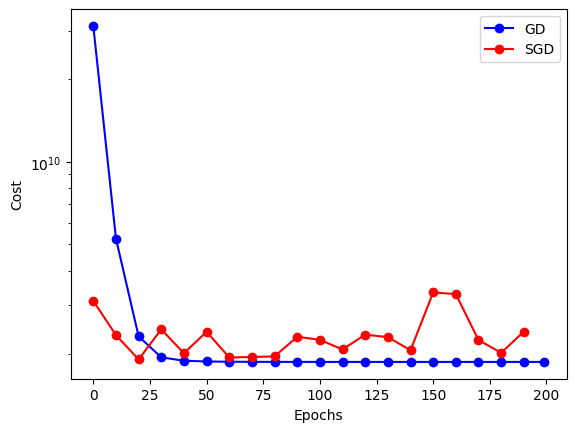

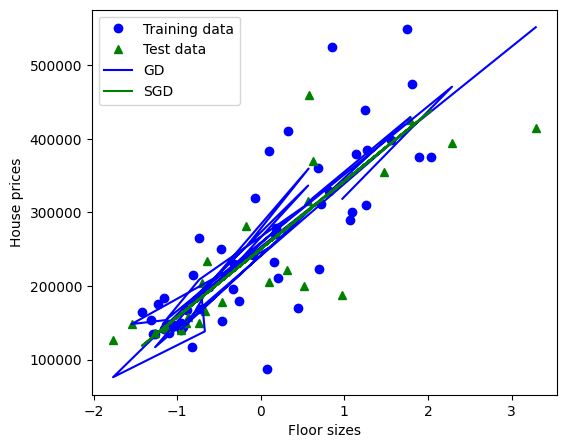

In [16]:
# Mount Google Drive
drive.mount('/content/drive')

# Define file paths
train_file_path = '/content/drive/My Drive/data/multiple/train.txt'
test_file_path = '/content/drive/My Drive/data/multiple/test.txt'

# Read the training and test data
Xtrain, ttrain = read_data(train_file_path)
Xtest, ttest = read_data(test_file_path)

# Standardize the training and test features using the mean and std computed over *training*.
mean, std = mean_std(Xtrain)
Xtrain = np.hstack((np.ones((Xtrain.shape[0], 1)), standardize(Xtrain, mean, std)))
Xtest = np.hstack((np.ones((Xtest.shape[0], 1)), standardize(Xtest, mean, std)))

# Computing parameters for each training method for eta=0.1 and 200 epochs
eta = 0.1
epochs = 200

# Training using batch gradient descent
w_gd, eph_gd, costs_gd = train(Xtrain, ttrain, eta, epochs)

# Training using stochastic gradient descent
w_sgd, eph_sgd, costs_sgd = train_SGD(Xtrain, ttrain, eta, epochs)

# Print model parameters
print('Params GD: ', w_gd)
print('Params SGD: ', w_sgd)

# Print cost and RMSE on training data
print('Training RMSE (GD): %0.2f.' % compute_rmse(Xtrain, ttrain, w_gd))
print('Training cost (GD): %0.2f.' % compute_cost(Xtrain, ttrain, w_gd))
print('Training RMSE (SGD): %0.2f.' % compute_rmse(Xtrain, ttrain, w_sgd))
print('Training cost (SGD): %0.2f.' % compute_cost(Xtrain, ttrain, w_sgd))

# Print cost and RMSE on test data
print('Test RMSE (GD): %0.2f.' % compute_rmse(Xtest, ttest, w_gd))
print('Test cost (GD): %0.2f.' % compute_cost(Xtest, ttest, w_gd))
print('Test RMSE (SGD): %0.2f.' % compute_rmse(Xtest, ttest, w_sgd))
print('Test cost (SGD): %0.2f.' % compute_cost(Xtest, ttest, w_sgd))

# Plotting Epochs vs. cost for Gradient descent methods
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.yscale('log')
plt.plot(eph_gd, costs_gd, 'bo-', label='GD')
plt.plot(eph_sgd, costs_sgd, 'ro-', label='SGD')
plt.legend()
plt.savefig('gd_vs_sgd_cost_multiple.png')
plt.show()

# Plotting floor size vs. house price
plt.figure(figsize=(6, 5))
plt.xlabel('Floor sizes')
plt.ylabel('House prices')
plt.plot(Xtrain[:, 1], ttrain, 'bo', label='Training data')
plt.plot(Xtest[:, 1], ttest, 'g^', label='Test data')
plt.plot(Xtest[:, 1], np.dot(Xtest, w_gd), 'b', label='GD')
plt.plot(Xtrain[:, 1], w_sgd[0] + w_sgd[1] * Xtrain[:, 1], 'g', label='SGD')
plt.legend()
plt.savefig('floor_size_vs_house_price.png')
plt.show()